In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [30]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
# Features & target
x = df.drop("target", axis=1)
y = df["target"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Decision Tree

In [33]:
# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

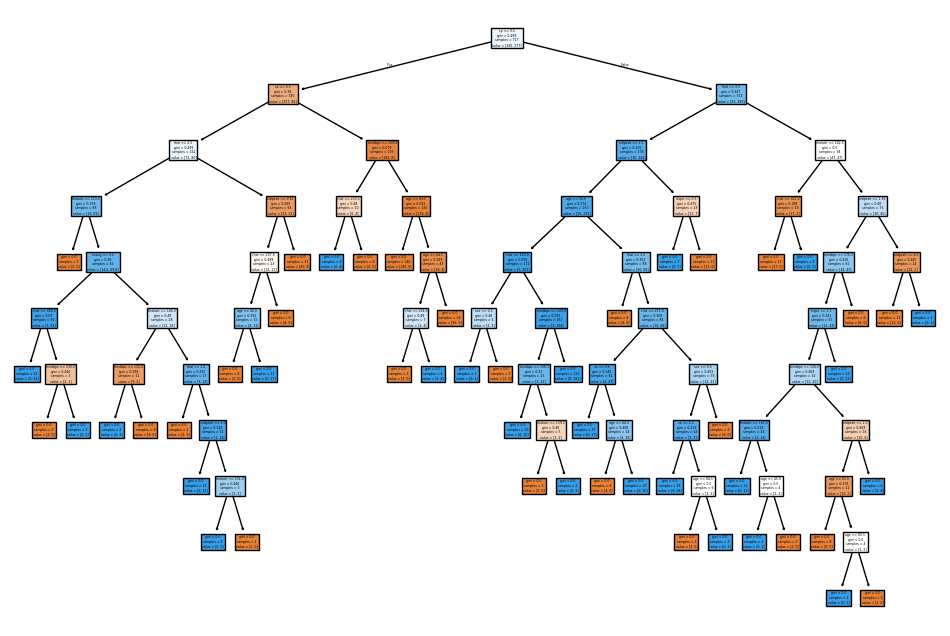

In [34]:
plt.figure(figsize=(12, 8))
plot_tree(dt,feature_names=x.columns,filled=True)
plt.show()

In [41]:
y_pred=model.predict(x_train)
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,model.predict(x_test)))

1.0
0.9707792207792207


In [39]:
new_model=DecisionTreeClassifier(max_depth=4, random_state=42)
new_model.fit(x_train, y_train)
new_y_pred=new_model.predict(x_train)

In [42]:
print(accuracy_score(y_train,new_y_pred))
print(accuracy_score(y_test,new_model.predict(x_test)))

0.8967921896792189
0.8344155844155844


####  Random Forest

In [52]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train, y_train)

print( accuracy_score(y_train, rf.predict(x_train)), accuracy_score(y_test, rf.predict(x_test)))

1.0 0.9805194805194806


     Feature  Importance
2         cp    0.132274
7    thalach    0.125039
11        ca    0.122912
9    oldpeak    0.122852
12      thal    0.113005
0        age    0.085554
4       chol    0.079872
3   trestbps    0.068356
10     slope    0.051335
8      exang    0.042210
1        sex    0.028721
6    restecg    0.018155
5        fbs    0.009714


<Axes: xlabel='Feature'>

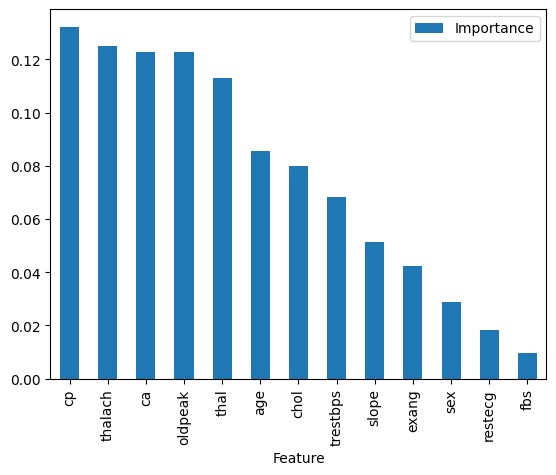

In [53]:
# Get feature importances into a DataFrame and sorting
f_imp = pd.DataFrame({
    'Feature':x.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(f_imp)

# Plot
f_imp.plot(kind='bar', x='Feature', y='Importance')


cp, thalach, and ca affect heart disease risk the most, while fasting blood sugar matters the least.

####  Cross-validation

In [54]:
# Perform cross-validation on the Random Forest model
cv_scores = cross_val_score(rf, x, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean CV accuracy: 0.9970731707317073


In [55]:
# Compute the correlation of each feature with the target variable
df.corr()["target"].sort_values(ascending=False)


target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64